## This bit of code makes the plot we used for our final poster for the SciComp GC 2020. 

We used data from [Type II Supernova Light Curves and Spectra from the CfA](https://iopscience.iop.org/article/10.3847/1538-4365/aa8ef4) to make these plots, and the XKCD plotting style from [matplotlib](https://matplotlib.org)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [2]:
# ascii.read is a very robust way to read the machine-readable data sets often given with papers
data = ascii.read('apjsaa8ef4t4_mrt.txt')

In [3]:
# We would like to plot the light curve of a single Supernova. So we select the one with the most number of total observations
names = data['SN']
counts, bins = np.histogram(names, np.unique(names))
sn = data[names==bins[counts.argmax()]]

In [4]:
# Now, we separate the data by filters
filters = np.unique(sn['Filt'])
print('Filters used in {} are:'.format(sn['SN'][0]))
_ = [print(i, end=' ') for i in filters]

Filters used in SN2005kd are:
B U V i' r' 

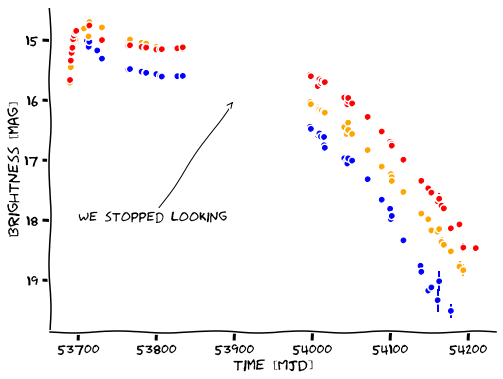

In [5]:
# we use matplotlib.pyplot.xkcd() to get the characteristic appearance from (no surprises here) XKCD
plt.xkcd()
plt.figure(figsize=(8,6))
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Note that we only plot the last three filters: V, i' and r', to avoid crowding the
for num,i in enumerate(filters[-3:]):
    plt.errorbar(sn['MJD'][sn['Filt']==i], sn['omag'][sn['Filt']==i], sn['e_omag'][sn['Filt']==i], ls='', marker=
                 'o', markersize= 4, color=['blue','orange','red'][num])

ax.invert_yaxis()

ax.set_xlabel('time [MJD]', fontsize=16)
ax.set_ylabel('brightness [mag]', fontsize=16)
ax.annotate(
    'We stopped looking',
    xy=(53900, 16), arrowprops=dict(arrowstyle='->'), xytext=(53700, 18))

plt.savefig('final_lightcurve.png')